# Decision Tree Model

Creating a decision tree model to predict the outcome of an premier league game.

## Importing Libraries

In [21]:
# ML libraries
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Data processing libraries
import pandas as pd

# Visuals
#!pip install graphviz
#!pip install pydotplus
#!pip install IPython
#import graphviz
#import pydotplus
#from IPython.display import Image
from matplotlib import pyplot as plt

## Loading datasets

In [22]:
df = pd.read_csv(r"League_Result_Data/TimeEncoded_PremierLeague_Stats_From_2014to2021.csv")

## Normal Dataset (Time Isn't Included)

### Splitting data

The data with be split into training and test data to ensure the integrity and proformance of the model

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             670 non-null    int64  
 1   Season                 670 non-null    object 
 2   Season Encoding        670 non-null    int64  
 3   Date                   670 non-null    object 
 4   YearOfSeason           632 non-null    object 
 5   Time                   670 non-null    object 
 6   Time Encoding          670 non-null    int64  
 7   HomeTeam               670 non-null    object 
 8   HomeTeam Encoding      670 non-null    int64  
 9   AwayTeam               670 non-null    object 
 10  AwayTeam Encoding      670 non-null    int64  
 11  FTHG                   670 non-null    float64
 12  FTAG                   670 non-null    float64
 13  FTR                    670 non-null    object 
 14  FTR Encoding           670 non-null    int64  
 15  HTHG  

## Encodes the YearOfSeason values

In [24]:
df = df.dropna()

seasons = set(df['YearOfSeason'].values)
seasons = list(seasons)

# re-orders the list 
seasons = ['2014/15', '2015/16', '2016/17', '2017/18', '2018/19', '2019/20', '2020/21']
seasons

['2014/15', '2015/16', '2016/17', '2017/18', '2018/19', '2019/20', '2020/21']

In [25]:
df['YearOfSeason Encoding'] = -1

for index, value in df['YearOfSeason'].iteritems():
    
    # 2014/15: 0
    if value == seasons[0]:
        df.at[index, 'YearOfSeason Encoding'] = 0
    
    # 2015/16: 1
    if value == seasons[1]:
        df.at[index, 'YearOfSeason Encoding'] = 1
        
    # 2016/17: 2
    if value == seasons[2]:
        df.at[index, 'YearOfSeason Encoding'] = 2
    
    # 2017/18: 3
    if value == seasons[3]:
        df.at[index, 'YearOfSeason Encoding'] = 3
        
    # 2018/19: 4
    if value == seasons[4]:
        df.at[index, 'YearOfSeason Encoding'] = 4
        
    # 2019/20: 5
    if value == seasons[5]:
        df.at[index, 'YearOfSeason Encoding'] = 5
    
    # 2020/21: 6
    if value == seasons[6]:
        df.at[index, 'YearOfSeason Encoding'] = 6 

In [26]:
"""
# Features -- Drops FTR and any categorical value 
X = df.drop(columns=["HTHG", "HTAG", "HTR Encoding", "Unnamed: 0", "FTHG", "FTAG", "Season", "YearOfSeason", "Date", "HomeTeam", "AwayTeam", "Referee", "FTR", "FTR Encoding", "HTR", "Referee"])
# Labels
y = df["FTR Encoding"]

"""
# Features -- Drops FTR and any categorical value 
X = df.drop(columns=["Unnamed: 0", "Season", "YearOfSeason", "Time","Date", "FTHG", "FTAG", "HomeTeam", "AwayTeam", "Referee", "FTR", "FTR Encoding", "HTR", "Referee"])
# Labels
y = df["FTR Encoding"]

In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 632 entries, 0 to 669
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Season Encoding        632 non-null    int64  
 1   Time Encoding          632 non-null    int64  
 2   HomeTeam Encoding      632 non-null    int64  
 3   AwayTeam Encoding      632 non-null    int64  
 4   HTHG                   632 non-null    float64
 5   HTAG                   632 non-null    float64
 6   Referee Encoding       632 non-null    int64  
 7   Fouls Called Per Game  632 non-null    float64
 8   HS                     632 non-null    float64
 9   AS                     632 non-null    float64
 10  HST                    632 non-null    float64
 11  AST                    632 non-null    float64
 12  HF                     632 non-null    float64
 13  AF                     632 non-null    float64
 14  HC                     632 non-null    float64
 15  AC    

In [28]:
X

,Season Encoding,Time Encoding,HomeTeam Encoding,AwayTeam Encoding,HTHG,HTAG,Referee Encoding,Fouls Called Per Game,HS,AS,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,YearOfSeason Encoding
0,0,0,8,0,0.0,1.0,7,14.0,5.0,13.0,...,6.0,12.0,12.0,2.0,3.0,2.0,2.0,0.0,0.0,6
1,0,2,6,21,1.0,0.0,27,14.0,5.0,9.0,...,5.0,14.0,11.0,7.0,3.0,2.0,1.0,0.0,0.0,6
2,0,2,13,11,3.0,2.0,28,14.0,22.0,6.0,...,3.0,9.0,6.0,9.0,0.0,1.0,0.0,0.0,0.0,6
3,0,2,28,17,0.0,0.0,11,13.0,15.0,15.0,...,2.0,13.0,7.0,8.0,7.0,2.0,2.0,0.0,0.0,6
4,0,1,27,12,0.0,0.0,10,15.0,7.0,13.0,...,7.0,12.0,9.0,2.0,5.0,1.0,1.0,0.0,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,3,1,12,15,0.0,0.0,16,14.0,14.0,7.0,...,3.0,12.0,11.0,3.0,3.0,1.0,4.0,1.0,0.0,5
666,3,1,14,18,2.0,0.0,25,15.0,31.0,5.0,...,4.0,7.0,4.0,9.0,0.0,1.0,1.0,0.0,0.0,5
667,3,1,17,13,1.0,1.0,10,15.0,3.0,14.0,...,6.0,11.0,5.0,2.0,4.0,1.0,0.0,0.0,0.0,5
668,3,1,21,20,0.0,1.0,3,13.0,13.0,5.0,...,3.0,9.0,16.0,9.0,1.0,0.0,1.0,0.0,0.0,5


In [29]:
"""
Target Varible - Full Time Results
0 - Home Team Win
1 - Away Team Win
2 - Draw
"""
y

0      1
1      0
2      0
3      1
4      1
      ..
665    1
666    0
667    1
668    0
669    2
Name: FTR Encoding, Length: 632, dtype: int64

In [30]:
# Splitting the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [31]:
# Scaling varibles to unit variance
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Fitting the model

Fitting the data to a decision tree model

In [32]:
# Declaring the decision tree classifier
tree_clf = tree.DecisionTreeClassifier(max_leaf_nodes = 15, 
                                      max_features=10,
                                      random_state=42,
                                      min_samples_split=3)

# Training the decision tree
clf_train = tree_clf.fit(X_train, y_train)

In [33]:
score = clf_train.score(X_test, y_test)

print(score)

0.5826771653543307


In [34]:
# Confusion Matrix

cv_score = cross_val_score(clf_train, X_train, y_train, cv=3, scoring='accuracy')

print(cv_score, '\n')

y_train_pred = cross_val_predict(clf_train, X_train, y_train, cv=3)
print(confusion_matrix(y_train, y_train_pred))

[0.57988166 0.54166667 0.60714286] 

[[145  19  46]
 [ 29 101  47]
 [ 47  26  45]]


In [35]:
# Precision, Recall, F1

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.66      0.69      0.67       210
           1       0.69      0.57      0.63       177
           2       0.33      0.38      0.35       118

    accuracy                           0.58       505
   macro avg       0.56      0.55      0.55       505
weighted avg       0.59      0.58      0.58       505



## Visualizing the tree

Create visual plots for the decision tree

In [36]:
fn = list(X.columns)
cn ='0', '1', '2'

In [37]:
cn

('0', '1', '2')

[Text(189.72, 203.85, 'X[4] <= -0.209\ngini = 0.65\nsamples = 505\nvalue = [210, 177, 118]'),
 Text(133.92000000000002, 176.67000000000002, 'X[11] <= 0.168\ngini = 0.617\nsamples = 262\nvalue = [56, 134, 72]'),
 Text(111.6, 149.49, 'X[5] <= -0.093\ngini = 0.662\nsamples = 160\nvalue = [47, 51, 62]'),
 Text(89.28, 122.31, 'X[11] <= -1.087\ngini = 0.648\nsamples = 108\nvalue = [37, 25, 46]'),
 Text(66.96000000000001, 95.13, 'X[6] <= 1.049\ngini = 0.528\nsamples = 28\nvalue = [15, 1, 12]'),
 Text(44.64, 67.94999999999999, 'X[15] <= -0.13\ngini = 0.533\nsamples = 22\nvalue = [9, 1, 12]'),
 Text(22.32, 40.77000000000001, 'gini = 0.48\nsamples = 15\nvalue = [9, 0, 6]'),
 Text(66.96000000000001, 40.77000000000001, 'gini = 0.245\nsamples = 7\nvalue = [0, 1, 6]'),
 Text(89.28, 67.94999999999999, 'gini = 0.0\nsamples = 6\nvalue = [6, 0, 0]'),
 Text(111.6, 95.13, 'gini = 0.654\nsamples = 80\nvalue = [22, 24, 34]'),
 Text(133.92000000000002, 122.31, 'gini = 0.618\nsamples = 52\nvalue = [10, 26, 16

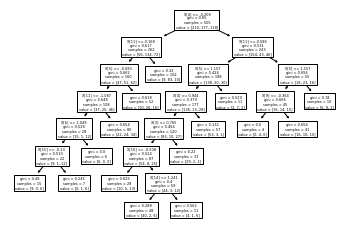

In [38]:
tree.plot_tree(clf_train)

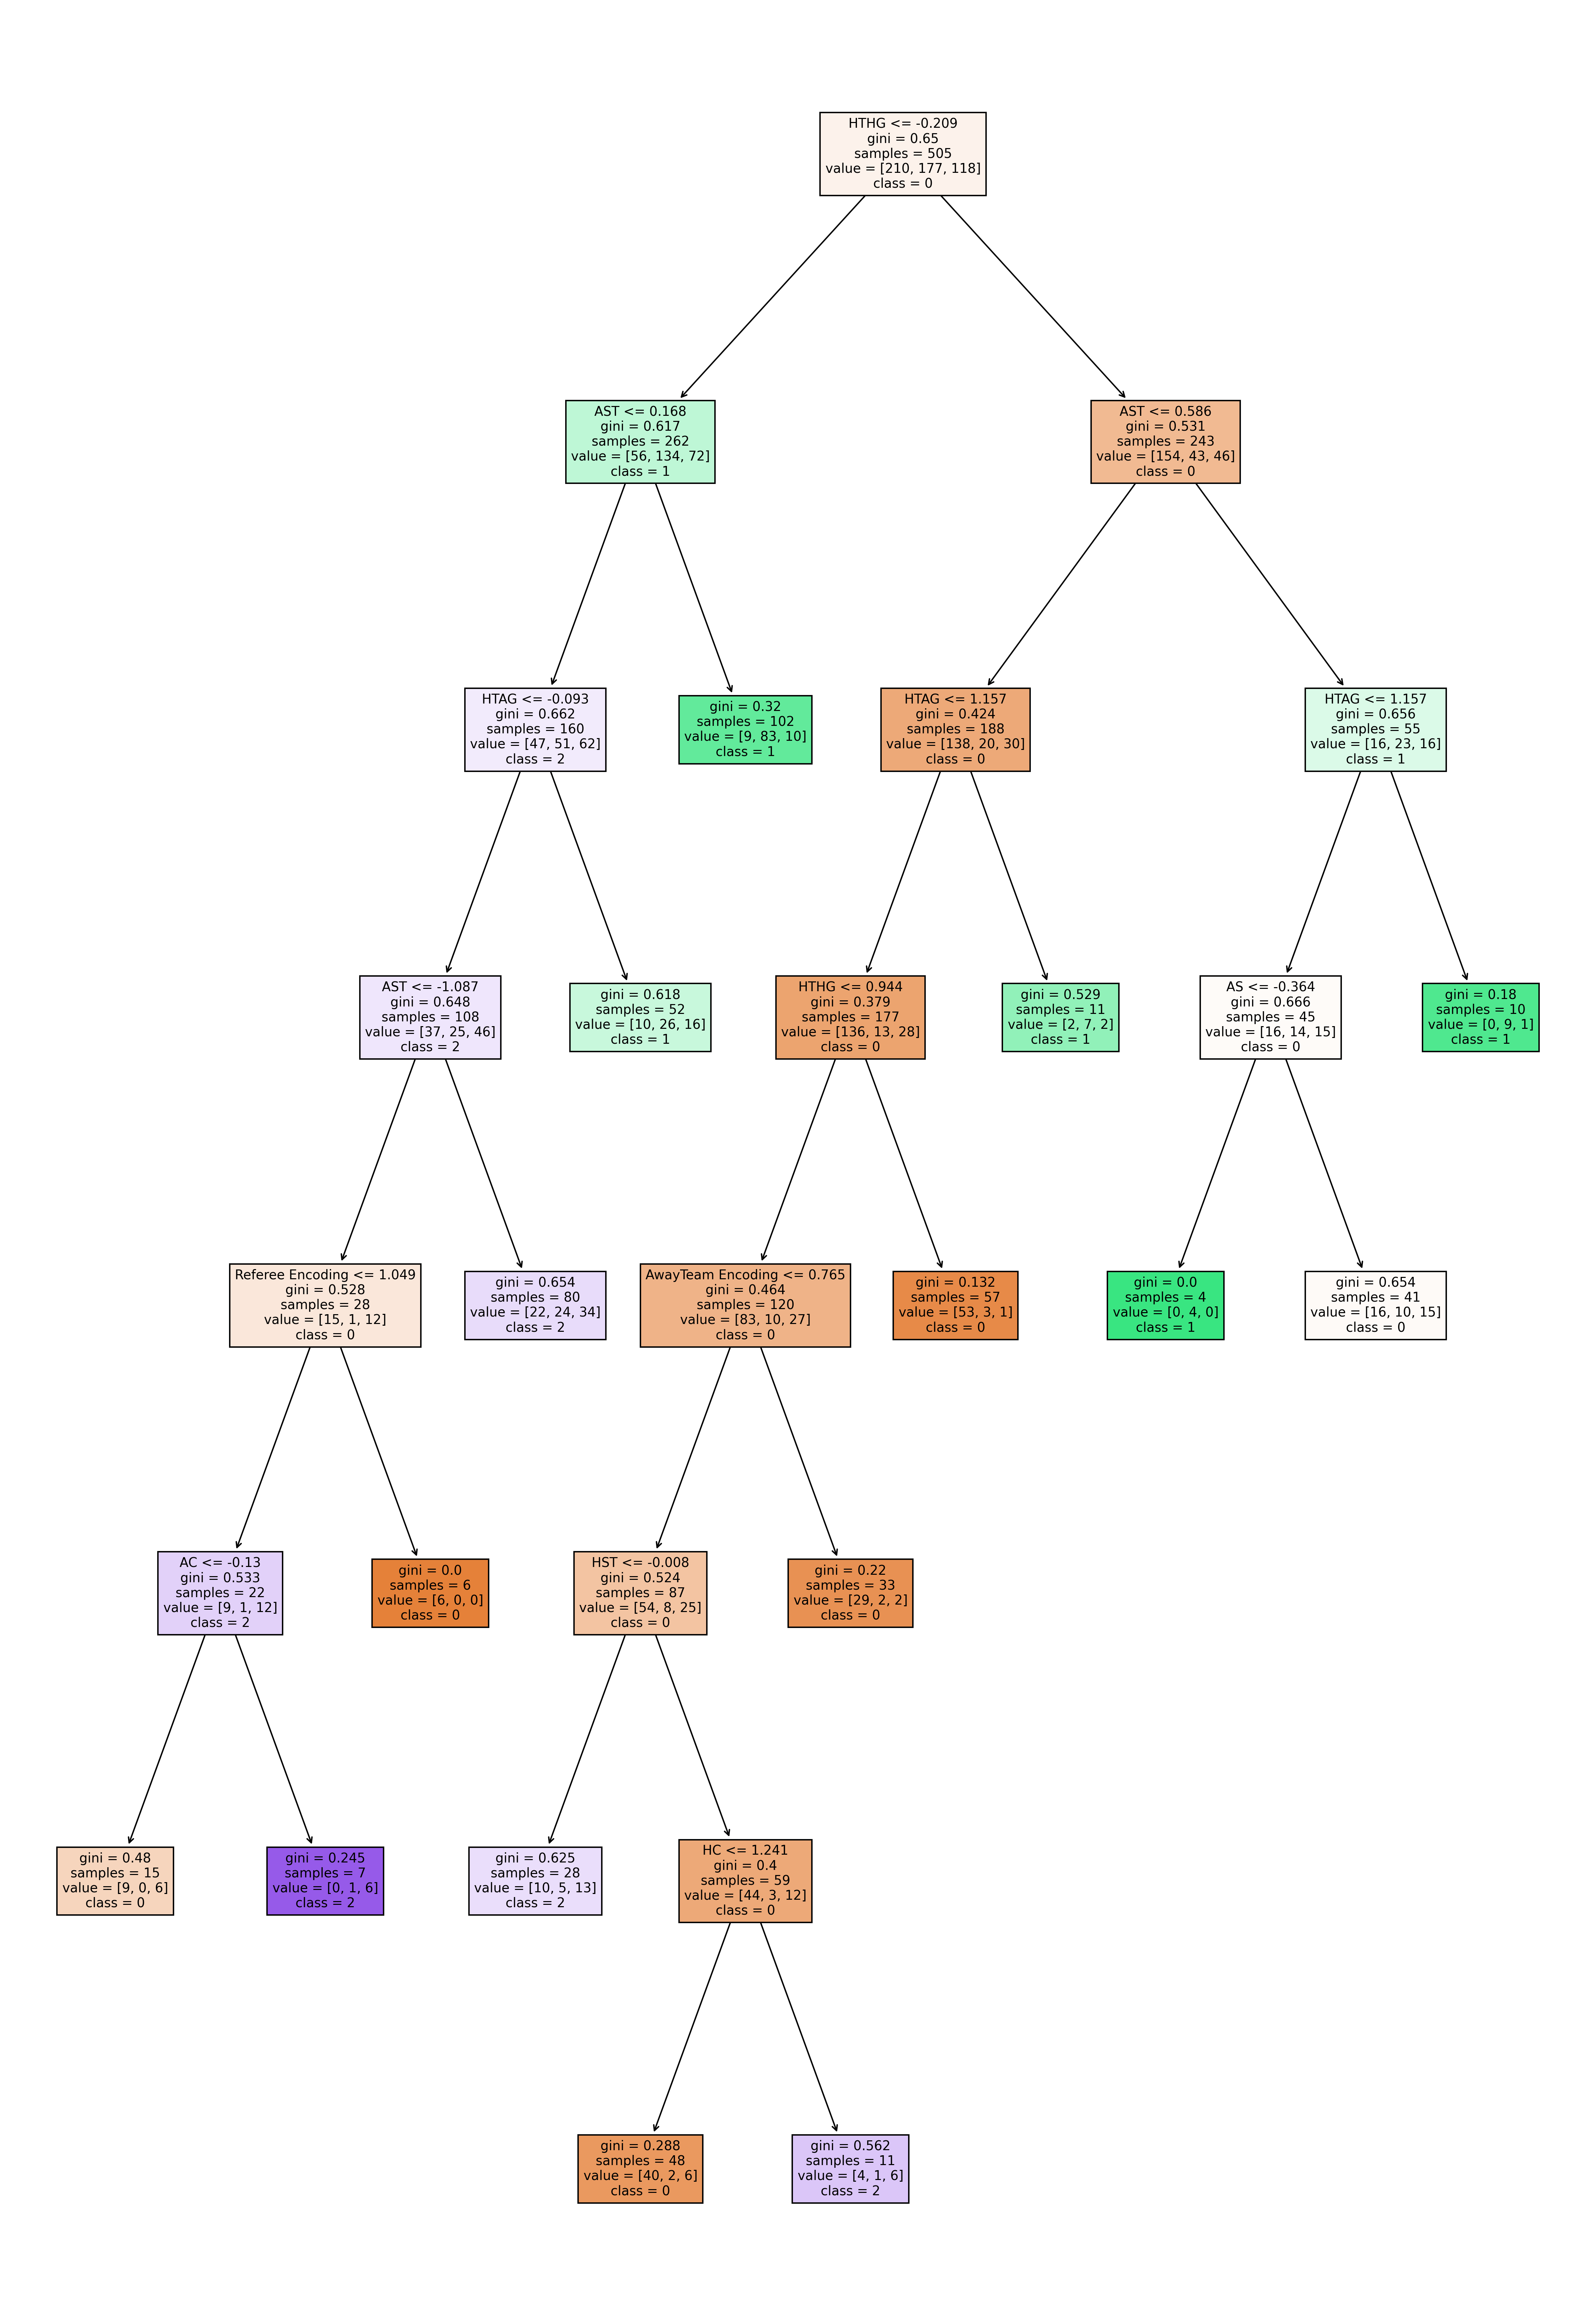

In [39]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,30), dpi=300)
tree.plot_tree(
    clf_train,
    feature_names = fn, 
    class_names=cn,           
    filled = True);

# 0 = Home win
# 1 = Away win
# 2 = Draw

Helpful link: https://towardsdatascience.com/scikit-learn-decision-trees-explained-803f3812290d